In [1]:
import sympy

from einsteinpy.symbolic import OPTSpacetime, OPTMetric, GenericVector, BaseRelativityTensor
from einsteinpy.symbolic.predefined import Schwarzschild
from einsteinpy.symbolic.tensor import tensor_product

sympy.init_printing()

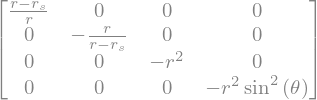

In [2]:
g = Schwarzschild(c=1)

t, r, theta, phi = g.symbols()
r_s = g.variables[0]
g.tensor()

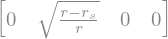

In [3]:
nvec = GenericVector([0,sympy.sqrt((r-r_s)/r), 0,0], syms=g.symbols(), config="u", parent_metric=g)
nvec.tensor()

In [4]:
# For the 1+3 decomposition, we need a unit timelike vector 
nvec.norm()

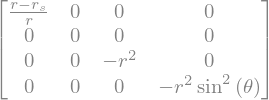

In [5]:
g = OPTMetric(g.tensor(), nvec, syms=g.symbols())
g.ProjectorTensor.tensor()

In [6]:
st = OPTSpacetime(g)
for s in dir(st):
    if not s.startswith('_'):
        print(s)

BelRobinsonTensor
ChristoffelSymbols
EinsteinTensor
ExpansionScalar
GravitoElectricTensor
GravitoMagneticTensor
LeviCivitaTensor
Metric
NormalVector
ProjectedAlternatingTensor
ProjectedAlternatingTensorDot
ProjectedNormalDerivatives
ProjectorTensor
RicciScalar
RicciTensor
RiemannTensor
SEMTensor
ShearTensor
VorticityTensor
VorticityVector
WeylTensor
covariant_derivative
curl
div
geodesic_equation
projected_covariant_derivative
projected_vector_dual
projection
pstf
spatial_trace
temporal_rotation
vector_product


### Projected Derivatives

In [7]:
u_dot, Du = st.projected_covariant_derivative(nvec)

In [8]:
u_dot.tensor()

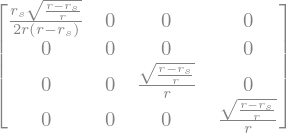

In [9]:
Du.tensor()

### Projected Tensors

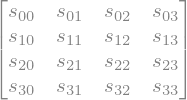

In [10]:
symbolstring = "s_00 s_01 s_02 s_03 s_10 s_11 s_12 s_13 s_20 s_21 s_22 s_23 s_30 s_31 s_32 s_33"
S = BaseRelativityTensor(sympy.Array([s for s in sympy.symbols(symbolstring)]).reshape(4,4), syms=g.symbols(), config='ll', parent_metric=g)
S.tensor()

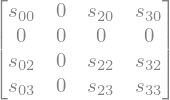

In [11]:
S_proj = st.projection(S)
S_proj.tensor()

True
0


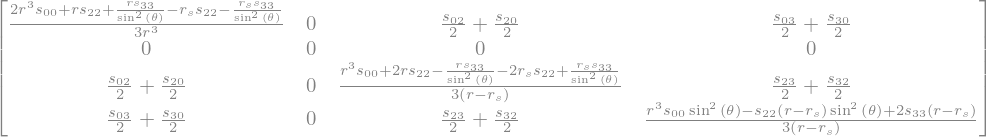

In [12]:
# Any projected tensor can be split into a projected symmetric tracefree part, ...
S_pstf = st.pstf(S)
print(S_pstf.symmetric_part().arr == S_pstf.arr)
print(sympy.simplify(st.spatial_trace(S_pstf)))
S_pstf.tensor()

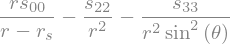

In [13]:
# a scalar trace part, ...
S_t = st.spatial_trace(S)
S_t

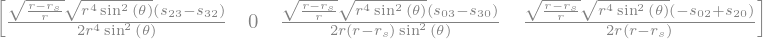

In [14]:
# and a vector part, ...
S_a = st.projected_vector_dual(S)
S_a.tensor()

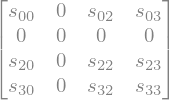

In [15]:
# which together recover the original projected tensor
sympy.simplify(S_t/3 * g.ProjectorTensor.tensor() 
                 + tensor_product(st.ProjectedAlternatingTensor, S_a.change_config("u"), 2,0).tensor() 
                 + S_pstf.tensor() )

### Dynamic Quantities

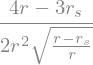

In [16]:
sympy.simplify(st.ExpansionScalar)

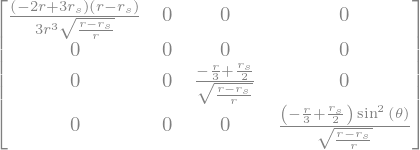

In [17]:
st.ShearTensor.tensor()

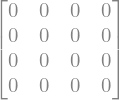

In [18]:
st.VorticityTensor.tensor()